# Reproduction of `PhysRevLett.92.218101`

```bibtex
@article{PhysRevLett.92.218101,
  title     = {{Reconstruction of Protein Structures from a Vectorial Representation}},
  author    = {Porto, Markus and Bastolla, Ugo and Roman, H. Eduardo and Vendruscolo, Michele},
  journal   = {Phys. Rev. Lett.},
  volume    = {92},
  issue     = {21},
  pages     = {218101},
  numpages  = {4},
  year      = {2004},
  month     = {May},
  publisher = {American Physical Society},
  doi       = {10.1103/PhysRevLett.92.218101},
  url       = {https://link.aps.org/doi/10.1103/PhysRevLett.92.218101}
}
```

In [1]:
import gemmi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy.stats
from torch_geometric.nn import radius_graph

sys.path.append("C:/GitWorks/expfold")
sns.set_style('whitegrid')

from expfold.coords.io import get_coords, get_optional_coords

In [2]:
st = gemmi.read_structure('../data/pdb/mmcif/1bea.cif.gz')
chain = st[0]['A'].get_polymer().first_conformer()
# atoms = {atom.name for res in chain for atom in res if not atom.name.startswith('H')}

In [3]:
# coords, res_group = get_optional_coords(chain, atoms=atoms)
coords = get_coords(chain, atoms=('CB', ), stack=False)

In [4]:
edge_index = radius_graph(coords, r=8.0)
cm = np.zeros((coords.shape[0], coords.shape[0]), dtype=np.int32)
cm[edge_index[0], edge_index[1]] = 1
cm_triu = np.triu(cm, k=3)
cm_k3 = cm_triu + cm_triu.T

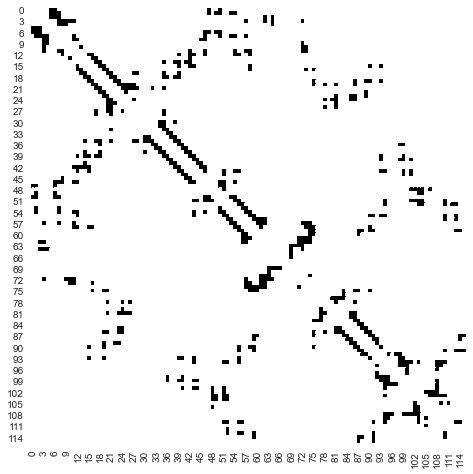

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_k3, cmap='gray_r', cbar=False, square=True)
plt.show()


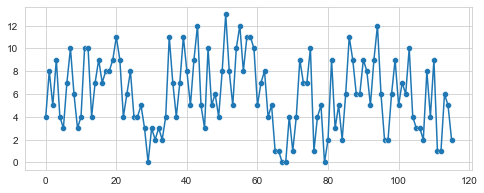

In [6]:
cn = cm_k3.sum(axis=0)
plt.figure(figsize=(8,3))
sns.scatterplot(data=cn)
sns.lineplot(data=cn)
plt.show()

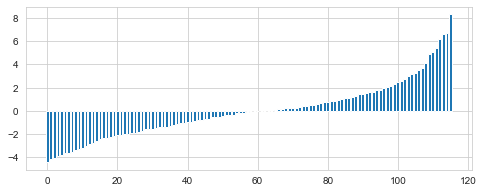

In [7]:
# u, s, vh = np.linalg.svd(cm_k3)
# eigen_vecs[:, -1] == u[:, 0]
eigen_vals, eigen_vecs = np.linalg.eigh(cm_k3)
plt.figure(figsize=(8,3))
plt.bar(x=range(len(eigen_vals)), height=eigen_vals)
plt.show()


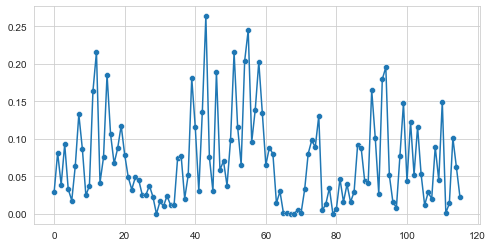

In [8]:
v1 = eigen_vecs[:, -1]
plt.figure(figsize=(8,4))
sns.lineplot(data=v1)
sns.scatterplot(data=v1)
plt.show()


LinregressResult(slope=0.016492329640908267, intercept=-0.027988933485836753, rvalue=0.8673443955394349, pvalue=2.4449544674829374e-36, stderr=0.0008863658540542863, intercept_stderr=0.005993572737155014)

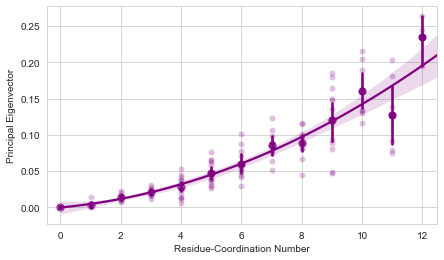

In [38]:
plt.figure(figsize=(7,4))
g = sns.regplot(x=cn, y=v1, color='purple', x_estimator=np.mean, order=2)
sns.scatterplot(x=cn, y=v1, color='purple', alpha=0.25)
g.set_xlim(-.45, 12.5)
g.set_ylabel('Principal Eigenvector')
g.set_xlabel('Residue-Coordination Number')
#plt.savefig('cn~pe.png', dpi=150, bbox_inches='tight')
lr = scipy.stats.linregress(cn, v1)
lr
